In [83]:
import math
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size']=14

In [25]:
#Computes fraction of the list that has the val.
def prob(lst, val):
    L = len(lst)
    if L > 0:
        p = float(len(lst[lst==val]))/L
    else:
        p = 0
    return p

In [2]:
#Determines the Entropy Contribution from a given probability
def entropyContribution(p):
    if p != 0:
        return p*math.log(p, 2)
    else:
        return 0

In [4]:
#Computes the entropy given a binary probability - 1 or 0
def binaryEntropy(list):
    p = prob(list, 1)
    S = entropyContribution(p) + entropyContribution(1-p)
    return S

In [58]:
train = pd.read_csv('/Users/michaeltwardos/Desktop/dt.csv')
train

,User,Converted,A1,A2
0,A,1,1,1
1,B,1,1,1
2,C,1,0,0
3,D,0,0,1
4,E,0,0,1


In [53]:
#Compute the overall entropy of the signal
print binaryEntropy(train.Converted)

Compute the entropy of each branch of the A1 split
print binaryEntropy(train[train.A1==0].Converted)
print binaryEntropy(train[train.A1==1].Converted)

-0.970950594455
-0.918295834054
0.0


In [60]:
#Compute the Absolute Conditional Entropy from using A1
print prob(train.A1, 1)*binaryEntropy(train[train.A1==1].Converted) + prob(train.A1, 0)*binaryEntropy(train[train.A1==0].Converted)

#Compute the Absolute Conditional Entropy from using A2
print prob(train.A2, 1)*binaryEntropy(train[train.A2==1].Converted) + prob(train.A2, 0)*binaryEntropy(train[train.A2==0].Converted)


-0.550977500433
-0.8


In [138]:
train2 = pd.read_csv('/Users/michaeltwardos/Desktop/decide.csv')
train2

,Unnamed: 0,converted,a,b,c
0,A,1,1,0,1
1,B,1,0,1,1
2,C,1,1,0,1
3,D,1,0,1,1
4,E,1,0,1,1
5,K,1,1,0,1
6,M,1,0,1,1
7,O,1,1,1,1
8,P,1,0,0,1
9,Q,1,0,0,1


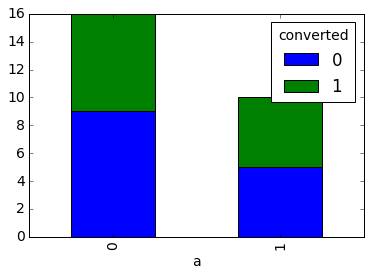

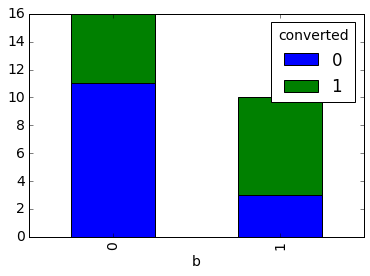

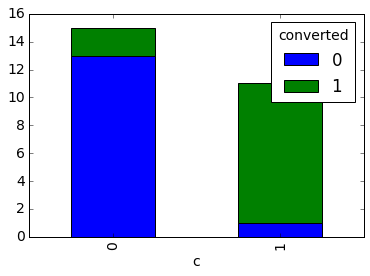

In [139]:
[train2.groupby(['a', 'converted'])['converted'].count().unstack('converted').plot(kind='bar', stacked=True),
 train2.groupby(['b', 'converted'])['converted'].count().unstack('converted').plot(kind='bar', stacked=True),
 train2.groupby(['c', 'converted'])['converted'].count().unstack('converted').plot(kind='bar', stacked=True)]

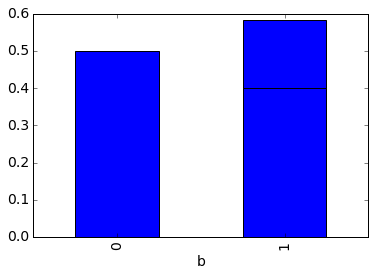

In [91]:
[train2.groupby('a').converted.mean().plot(kind='bar', stacked=True), train2.groupby('b').converted.mean().plot(kind='bar', stacked=True)]

In [92]:
zz=train2.groupby('a').converted.mean()
zz

a
0    0.357143
1    0.583333
Name: converted, dtype: float64

In [66]:
#Compute the overall entropy of the signal
print binaryEntropy(train2.converted)

#Compute the entropy of each branch of the A1 split
print binaryEntropy(train2[train2.c==0].converted)
print binaryEntropy(train2[train2.c==1].converted)

-0.995727452085
-0.5435644432
0.0


In [67]:
#Compute the Absolute Conditional Entropy from using a
print prob(train2.a, 1)*binaryEntropy(train2[train2.a==1].converted) + prob(train2.a, 0)*binaryEntropy(train2[train2.a==0].converted)

#Compute the Absolute Conditional Entropy from using b
print prob(train2.b, 1)*binaryEntropy(train2[train2.b==1].converted) + prob(train2.b, 0)*binaryEntropy(train2[train2.b==0].converted)

#Compute the Absolute Conditional Entropy from using c
print prob(train2.c, 1)*binaryEntropy(train2[train2.c==1].converted) + prob(train2.c, 0)*binaryEntropy(train2[train2.c==0].converted)


-0.958554942354
-0.988827151713
-0.334501195815


In [73]:
print prob(train2[train2.c==0].converted, 0)

print prob(train2[train2.c==1].converted, 1)

0.875
1.0


In [76]:
feature_cols=['a', 'b', 'c']
X=train2[feature_cols]
y=train2.converted

In [77]:
from sklearn.tree import DecisionTreeClassifier
treeclf=DecisionTreeClassifier(random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [78]:
treeclf.feature_importances_

array([ 0.06227379,  0.02490952,  0.91281669])